## Note
1. Setelah user pertama kali login (baru bikin akun), maka kita akan memberikan test/ujian untuk mengetahui kemampuan user. Nah, ai akan menganalisis kemampuan user dan memberikan kelas/pelajaran yang sesuai.
2. Setelah user selesai mengerjakan kelas (ada ujian juga), maka ai akan memberikan analisis perkembangan user
3. Untuk data gitu kan sebenarnya kita ngambil data kemampuan user dari survey/kuis/ujian yang kita berikan.
4. Nah, nanti ai nya akan menganalisa berdasarkan survey. Misal, user kekurangan/butuh belajar di materi apa.

# Pembuatan Dataset

## Dummy DataSet
- membuat dataset user secara acak
- setiap user mempunyai kelas dan score yang berbeda beda

In [1]:
import pandas as pd
import numpy as np
import random

# Atur parameter
jumlah_user = 300
jumlah_kelas = 5
max_quiz = 10

# Buat user_id dan class_id
user_ids = [f"U{str(i).zfill(3)}" for i in range(1, jumlah_user + 1)]
class_ids = [f"C{str(i).zfill(2)}" for i in range(1, jumlah_kelas + 1)]

data = []

for user in user_ids:
    # Setiap user ikut 1 atau 2 kelas
    ikut_kelas = random.sample(class_ids, random.choice([1, 2]))

    for kelas in ikut_kelas:
        jumlah_quiz = random.randint(3, max_quiz)
        quizzes = [random.randint(50, 100) for _ in range(jumlah_quiz)]
        quizzes += [np.nan] * (max_quiz - jumlah_quiz)  # padding NaN

        avg_quiz = np.nanmean(quizzes)

        # Final score: bisa meningkat, stabil, atau menurun dari quiz avg
        final_score = int(np.clip(np.random.normal(loc=avg_quiz + random.choice([-5, 0, 5]), scale=5), 40, 100))

        row = [user, kelas] + quizzes + [final_score]
        data.append(row)

# Buat kolom
columns = ["user_id", "class_id"] + [f"quiz_{i}" for i in range(1, max_quiz + 1)] + ["final_score"]
df = pd.DataFrame(data, columns=columns)

# Simpan ke CSV
df.to_csv("dummy_user_scores.csv", index=False)
print("✅ Dataset dummy berhasil dibuat dan disimpan sebagai 'dummy_user_scores.csv'")

# Tampilkan 5 baris pertama
df.head()


✅ Dataset dummy berhasil dibuat dan disimpan sebagai 'dummy_user_scores.csv'


,user_id,class_id,quiz_1,quiz_2,quiz_3,quiz_4,quiz_5,quiz_6,quiz_7,quiz_8,quiz_9,quiz_10,final_score
0,U001,C02,86,73,93,94.0,63.0,63.0,NaN,NaN,NaN,NaN,76
1,U002,C01,89,63,89,83.0,57.0,86.0,53.0,74.0,89.0,75.0,81
2,U002,C04,74,72,62,86.0,60.0,99.0,95.0,86.0,85.0,NaN,85
3,U003,C05,85,97,83,82.0,100.0,100.0,75.0,NaN,NaN,NaN,89
4,U003,C03,80,70,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66


In [2]:
# Load dataset (kalau belum diload)
import pandas as pd

df = pd.read_csv("dummy_user_scores.csv")

# Hitung rata-rata quiz
quiz_cols = [f"quiz_{i}" for i in range(1, 11)]
df["quiz_avg"] = df[quiz_cols].mean(axis=1)

# Hitung selisih antara nilai akhir dan rata-rata quiz
df["delta"] = df["final_score"] - df["quiz_avg"]

# Tentukan status perkembangan
def label_status(delta):
    if delta > 5:
        return "improved"
    elif delta < -5:
        return "regressed"
    else:
        return "stable"

df["progress_status"] = df["delta"].apply(label_status)

# Tampilkan ringkasan hasil
print("Distribusi status perkembangan:")
print(df["progress_status"].value_counts())

# Tampilkan beberapa contoh
df[["user_id", "class_id", "quiz_avg", "final_score", "delta", "progress_status"]].head()


Distribusi status perkembangan:
progress_status
stable       247
regressed    108
improved     106
Name: count, dtype: int64


,user_id,class_id,quiz_avg,final_score,delta,progress_status
0,U001,C02,78.666667,76,-2.666667,stable
1,U002,C01,75.800000,81,5.200000,improved
2,U002,C04,79.888889,85,5.111111,improved
3,U003,C05,88.857143,89,0.142857,stable
4,U003,C03,67.000000,66,-1.000000,stable


<ipython-input-3-4004ea2e5045>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="progress_status", palette="Set2")


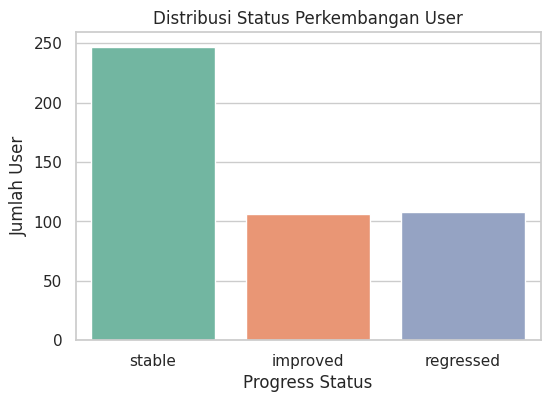

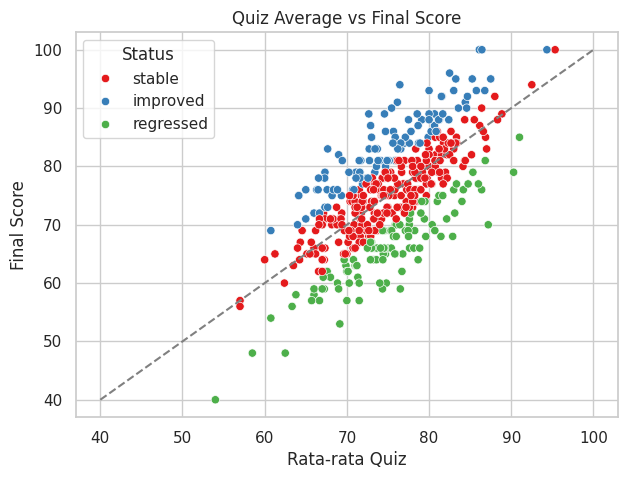

<ipython-input-3-4004ea2e5045>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="progress_status", y="final_score", palette="Set3")


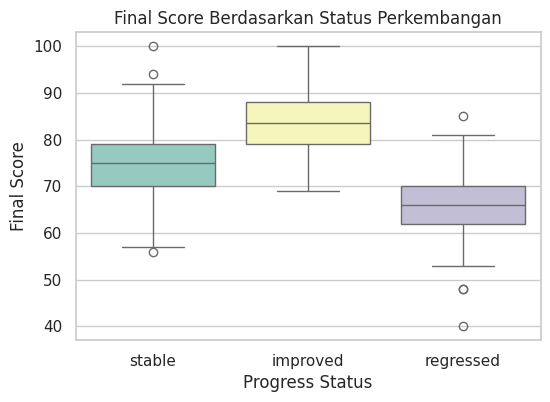

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Distribusi Status Perkembangan
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="progress_status", palette="Set2")
plt.title("Distribusi Status Perkembangan User")
plt.xlabel("Progress Status")
plt.ylabel("Jumlah User")
plt.show()

# 2. Scatter Plot: Quiz Avg vs Final Score
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="quiz_avg", y="final_score", hue="progress_status", palette="Set1")
plt.plot([40, 100], [40, 100], ls="--", c="gray")  # garis ideal
plt.title("Quiz Average vs Final Score")
plt.xlabel("Rata-rata Quiz")
plt.ylabel("Final Score")
plt.legend(title="Status")
plt.show()

# 3. Boxplot Final Score per Progress Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="progress_status", y="final_score", palette="Set3")
plt.title("Final Score Berdasarkan Status Perkembangan")
plt.xlabel("Progress Status")
plt.ylabel("Final Score")
plt.show()


# Modeling Machine Learning


Classification Report:
              precision    recall  f1-score   support

    improved       0.56      0.72      0.63        46
   regressed       0.57      0.72      0.63        46
      stable       0.53      0.30      0.38        57

    accuracy                           0.56       149
   macro avg       0.55      0.58      0.55       149
weighted avg       0.55      0.56      0.54       149



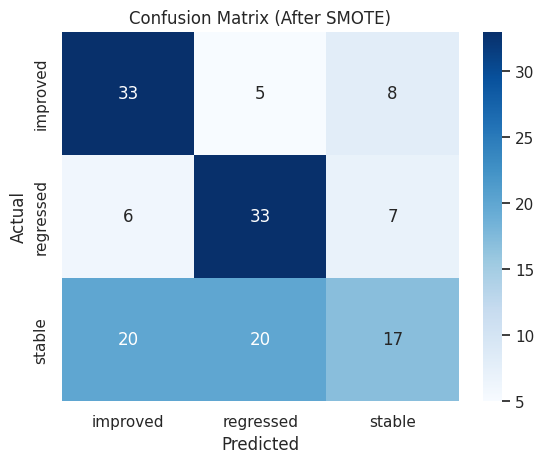

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df["progress_status"])
X = df[[f"quiz_{i}" for i in range(1, 11)]]

# Isi NaN (quiz yang kosong) dengan rata-rata barisnya
X = X.apply(lambda row: row.fillna(row.mean()), axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


In [5]:
# Hitung persentase perubahan antara rata-rata kuis dan nilai akhir
df["progress_percentage"] = ((df["final_score"] - df["quiz_avg"]) / df["quiz_avg"]) * 100

# Tentukan apakah user berkembang, menurun, atau stabil berdasarkan perubahan tersebut
def development_status(progress_percentage):
    if progress_percentage > 20:
        return "Developed"
    elif progress_percentage < -20:
        return "Declined"
    else:
        return "Stable"

df["development_status"] = df["progress_percentage"].apply(development_status)

# Tampilkan beberapa contoh
df[["user_id", "class_id", "quiz_avg", "final_score", "progress_percentage", "development_status"]].head()


,user_id,class_id,quiz_avg,final_score,progress_percentage,development_status
0,U001,C02,78.666667,76,-3.389831,Stable
1,U002,C01,75.800000,81,6.860158,Stable
2,U002,C04,79.888889,85,6.397775,Stable
3,U003,C05,88.857143,89,0.160772,Stable
4,U003,C03,67.000000,66,-1.492537,Stable


In [6]:
# Hitung nilai terendah per quiz
quiz_avg_per_quiz = df[quiz_cols].mean(axis=0)

# Menampilkan quiz dengan nilai terendah (bab mana yang perlu diperbaiki)
lowest_quiz = quiz_avg_per_quiz.idxmin()
lowest_score = quiz_avg_per_quiz.min()

print(f"Quiz dengan performa terendah adalah: {lowest_quiz} dengan rata-rata nilai: {lowest_score:.2f}")


Quiz dengan performa terendah adalah: quiz_5 dengan rata-rata nilai: 73.88


In [7]:
# Hitung perkembangan
df["progress_percentage"] = ((df["final_score"] - df["quiz_avg"]) / df["quiz_avg"]) * 100
df["development_status"] = df["progress_percentage"].apply(development_status)

# Cek quiz dengan nilai terendah
quiz_avg_per_quiz = df[quiz_cols].mean(axis=0)
lowest_quiz = quiz_avg_per_quiz.idxmin()
lowest_score = quiz_avg_per_quiz.min()

# Output untuk setiap user
# for idx, row in df.iterrows():
#     print(f"User {row['user_id']} ({row['class_id']}):")
#     print(f"  - Development Status: {row['development_status']}")
#     print(f"  - Progress Percentage: {row['progress_percentage']:.2f}%")
#     print(f"  - Quiz with lowest score: {lowest_quiz} ({lowest_score:.2f})\n")


In [8]:
import joblib
joblib.dump(clf, "progress_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [9]:
import pandas as pd
import numpy as np
import joblib

# Load model yang sudah dilatih
clf = joblib.load("progress_model.pkl")
le = joblib.load("label_encoder.pkl")

# Kolom quiz seperti sebelumnya
quiz_cols = [f"quiz_{i}" for i in range(1, 11)]

# Data kuis pengguna baru (nilai kuis 1-10)
new_user_quizzes = [70, 75, 80, 90, 60, 85, 70, 80, 88, 78]

# Ubah menjadi DataFrame
new_user = pd.DataFrame([new_user_quizzes], columns=quiz_cols)

# Lakukan prediksi menggunakan model AI (Random Forest)
predicted_class = clf.predict(new_user)
predicted_status = le.inverse_transform(predicted_class)[0]

# Menghitung rata-rata kuis
new_user_avg = new_user.mean(axis=1).iloc[0]

# Prediksi perkembangan (gunakan final_score untuk menghitung % perkembangan)
final_score = 85  # Misalnya, ini nilai ujian akhir
progress_percentage = ((final_score - new_user_avg) / new_user_avg) * 100

# Tentukan status perkembangan berdasarkan prediksi
def development_status(progress_percentage):
    if progress_percentage > 20:
        return "Developed"
    elif progress_percentage < -20:
        return "Declined"
    else:
        return "Stable"

development_status = development_status(progress_percentage)

# Output untuk pengguna baru
print(f"Pengguna Baru:")
print(f"  - Rata-rata Quiz: {new_user_avg:.2f}")
print(f"  - Final Score: {final_score}")
print(f"  - Prediksi Perkembangan AI: {predicted_status}")
print(f"  - Persentase Perkembangan: {progress_percentage:.2f}%")
print(f"  - Status Perkembangan: {development_status}")


Pengguna Baru:
  - Rata-rata Quiz: 77.60
  - Final Score: 85
  - Prediksi Perkembangan AI: improved
  - Persentase Perkembangan: 9.54%
  - Status Perkembangan: Stable
